<a href="https://colab.research.google.com/github/chuka19952/MALARIA-DL/blob/master/Loan_prediction_default_system(DSN_PROJECT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series,DataFrame 
from datetime import date
import datetime as DT
import io



In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test.csv to test.csv
Saving train.csv to train.csv
User uploaded file "test.csv" with length 21957 bytes
User uploaded file "train.csv" with length 38013 bytes


In [0]:
#importing the datasets
df12=pd.read_csv('train.csv')
df13=pd.read_csv('test.csv')


#DATA PRE-PROCESSING
#for train set
df12['Gender'].value_counts()
df12.Gender = df12.Gender.fillna('Male')

df12['Married'].value_counts()
df12.Married = df12.Married.fillna('Yes')

df12['Dependents'].value_counts()
df12.Dependents = df12.Dependents.fillna('0')

df12['Self_Employed'].value_counts()
df12.Self_Employed = df12.Self_Employed.fillna('No')

df12['LoanAmount'].value_counts()
df12.LoanAmount = df12.LoanAmount.fillna(df12['LoanAmount'].mean())

df12['Loan_Amount_Term'].value_counts()
df12.Loan_Amount_Term = df12.Loan_Amount_Term.fillna(360)

df12['Credit_History'].value_counts()
df12.Credit_History = df12.Credit_History.fillna(1.0)

#for test set
df13['Gender'].value_counts()
df13.Gender = df13.Gender.fillna('Male')

df13['Married'].value_counts()
df13.Married = df13.Married.fillna('Yes')

df13['Dependents'].value_counts()
df13.Dependents = df13.Dependents.fillna('0')

df13['Self_Employed'].value_counts()
df13.Self_Employed = df13.Self_Employed.fillna('No')

df13['LoanAmount'].value_counts()
df13.LoanAmount = df13.LoanAmount.fillna(df12['LoanAmount'].mean())

df13['Loan_Amount_Term'].value_counts()
df13.Loan_Amount_Term = df13.Loan_Amount_Term.fillna(360)

df13['Credit_History'].value_counts()
df13.Credit_History = df13.Credit_History.fillna(1.0)

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate            No   
12   LP001028    Male     Yes          2      Graduate            No   
13   LP001029    Male      No          0      Graduate            No   
14   LP001030    Male     Yes          2      Graduate            No   
15   LP001032    Male      No          0      Graduate            No   
16   LP001034    Male      No          1  Not Graduate            No   
17   LP001036  Female      No          0      Graduate            No   
18   LP001038    Male     Yes          0  Not Graduate            No   
19   LP001041    Male     Yes          0      Graduate            No   
20   LP001043    Male     Yes          0  Not Graduate            No   
21   LP001046    Male     Yes          1      Graduate            No   
22   LP001047    Male     Yes          0  Not Graduate            No   
23   LP001050    Male     Yes          2  Not Graduate            No   
24   LP001052    Male     Yes          1      Graduate            No   
25   LP001066    Male     Yes          0      Graduate           Yes   
26   LP001068    Male     Yes          0      Graduate            No   
27   LP001073    Male     Yes          2  Not Graduate            No   
28   LP001086    Male      No          0  Not Graduate            No   
29   LP001087  Female      No          2      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
584  LP002911    Male     Yes          1      Graduate            No   
585  LP002912    Male     Yes          1      Graduate            No   
586  LP002916    Male     Yes          0      Graduate            No   
587  LP002917  Female      No          0  Not Graduate            No   
588  LP002925    Male      No          0      Graduate            No   
589  LP002926    Male     Yes          2      Graduate           Yes   
590  LP002928    Male     Yes          0      Graduate            No   
591  LP002931    Male     Yes          2      Graduate           Yes   
592  LP002933    Male      No         3+      Graduate           Yes   
593  LP002936    Male     Yes          0      Graduate            No   
594  LP002938    Male     Yes          0      Graduate           Yes   
595  LP002940    Male      No          0  Not Graduate            No   
596  LP002941    Male     Yes          2  Not Graduate           Yes   
597  LP002943    Male      No          0      Graduate            No   
598  LP002945    Male     Yes          0      Graduate           Yes   
599  LP002948    Male     Yes          2      Graduate            No   
600  LP002949  Female      No         3+      Graduate            No   
601  LP002950    Male     Yes          0  Not Graduate            No   
602  LP002953    Male     Yes         3+      Graduate            No   
603  LP002958    Male      No          0      Graduate            No   
604  LP002959  Female     Yes          1      Graduate            No   
605  LP002960    Male     Yes          0  Not Graduate            No   
606  LP002961    Male     Yes          1      Graduate            No   
607  LP002964    Male     Yes          2  Not 

**1.O  DATA VISUALIZATIONS**

        Having applied the feature ranking method of Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)method, we were left with for four independent variables that were statistically related to the dependent variable "Loan Status". To get the actual value for ranking we applied the ExtraTrees Classifiers ranking algorithm which graded all the features according to their mean loss. 

#              Rank List according to importance in descending order:
    
             * Credit History - 0.28
             
             * Loan Amount - 0.18
             
             * Applicant Income- 0.17
             
             * CoApplicant Income -0.15
                         
                         
              While other features as tested had little or no statistical relevance to our dataset hence did affect our accuracy.

In [5]:


# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(df12).mark_point().encode(
  x='LoanAmount',
  y='ApplicantIncome',
  color='Loan_Status'
).interactive()

Chart({
  data:       Loan_ID  Gender Married Dependents     Education Self_Employed  \
  0    LP001002    Male      No          0      Graduate            No   
  1    LP001003    Male     Yes          1      Graduate            No   
  2    LP001005    Male     Yes          0      Graduate           Yes   
  3    LP001006    Male     Yes          0  Not Graduate            No   
  4    LP001008    Male      No          0      Graduate            No   
  5    LP001011    Male     Yes          2      Graduate           Yes   
  6    LP001013    Male     Yes          0  Not Graduate            No   
  7    LP001014    Male     Yes         3+      Graduate            No   
  8    LP001018    Male     Yes          2      Graduate            No   
  9    LP001020    Male     Yes          1      Graduate            No   
  10   LP001024    Male     Yes          2      Graduate            No   
  11   LP001027    Male     Yes          2      Graduate            No   
  12   LP001028    Male     Yes          2      Graduate            No   
  13   LP001029    Male      No          0      Graduate            No   
  14   LP001030    Male     Yes          2      Graduate            No   
  15   LP001032    Male      No          0      Graduate            No   
  16   LP001034    Male      No          1  Not Graduate            No   
  17   LP001036  Female      No          0      Graduate            No   
  18   LP001038    Male     Yes          0  Not Graduate            No   
  19   LP001041    Male     Yes          0      Graduate            No   
  20   LP001043    Male     Yes          0  Not Graduate            No   
  21   LP001046    Male     Yes          1      Graduate            No   
  22   LP001047    Male     Yes          0  Not Graduate            No   
  23   LP001050    Male     Yes          2  Not Graduate            No   
  24   LP001052    Male     Yes          1      Graduate            No   
  25   LP001066    Male     Yes          0      Graduate           Yes   
  26   LP001068    Male     Yes          0      Graduate            No   
  27   LP001073    Male     Yes          2  Not Graduate            No   
  28   LP001086    Male      No          0  Not Graduate            No   
  29   LP001087  Female      No          2      Graduate            No   
  ..        ...     ...     ...        ...           ...           ...   
  584  LP002911    Male     Yes          1      Graduate            No   
  585  LP002912    Male     Yes          1      Graduate            No   
  586  LP002916    Male     Yes          0      Graduate            No   
  587  LP002917  Female      No          0  Not Graduate            No   
  588  LP002925    Male      No          0      Graduate            No   
  589  LP002926    Male     Yes          2      Graduate           Yes   
  590  LP002928    Male     Yes          0      Graduate            No   
  591  LP002931    Male     Yes          2      Graduate           Yes   
  592  LP002933    Male      No         3+      Graduate           Yes   
  593  LP002936    Male     Yes          0      Graduate            No   
  594  LP002938    Male     Yes          0      Graduate           Yes   
  595  LP002940    Male      No          0  Not Graduate            No   
  596  LP002941    Male     Yes          2  Not Graduate           Yes   
  597  LP002943    Male      No          0      Graduate            No   
  598  LP002945    Male     Yes          0      Graduate           Yes   
  599  LP002948    Male     Yes          2      Graduate            No   
  600  LP002949  Female      No         3+      Graduate            No   
  601  LP002950    Male     Yes          0  Not Graduate            No   
  602  LP002953    Male     Yes         3+      Graduate            No   
  603  LP002958    Male      No          0      Graduate            No   
  604  LP002959  Female     Yes          1      Graduate            No   
  605  LP002960    Male     Yes          0  Not Graduate        

For this session, we would be focusing on the 4 major effective variables according to the our feature ranking. The above is a scatter plot of Loan Amount and each applicants income. Here, we are trying to find out who are customers are, what calibre and category of people patronize our loan system. From our scatter plot above, we can see that our loan system is highly patronized by applicants earning income below 20,000,about 85% and of course , it wont be counted as an extreme generalization if we say that low income earners(as far as this case study is concerned) have a high affinity for loans or borrowing money. For better clarity, we would go ahead to view it on a histogram.



---



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


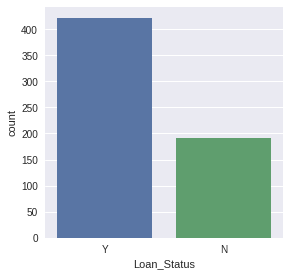

In [19]:
sns.factorplot('Loan_Status',kind ='count',data=df12)

so obviously, looking at the above histogram, the 'yes' customers are 2x the 'no' customers but we wont consider this a bias worthy of model over/underfitting.

## Now we would see how the credit history relates to the loan status

here, we want to see how our clients performed relative to their previous loan transactions(credit history). 1 means the performed well and 0 means otherwise.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


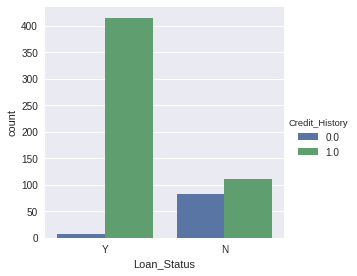

In [20]:
sns.factorplot('Loan_Status',kind ='count',data=df12, hue='Credit_History')

A credit history is a record of a borrower's responsible repayment of debts. So we can see that not all that did well in their past loan records were granted same priviledge again hence  we can conclude that the criteria for loan eligibility is not totally dependent on  the credit history even though it seems to be the most statistically relevant amongst other feaures.

considering the intuition that people who live or owns properties in urban, semi-urban or rural areas are liable to vary in terms of their compliance to loans, we would the visualize the relationship between the property area and the loan status as well as the property area and the employment status  and also the income and married features.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


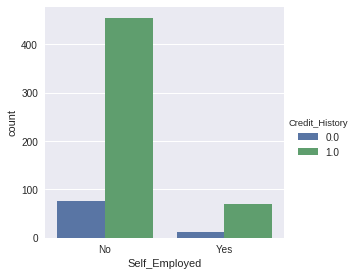

In [12]:


sns.factorplot('Self_Employed',data=df12,kind='count', hue='Credit_History')

The intuition behind the above plot suggests to us more details about our clients that applied and still seeking for a loan, that according to the relationship between thier credit history and the work status we can see that most of our loan-seeking clients are not self employed meaning that they are prevalently government workers recieving a consistent inflow of salaries/income which allows them a certain convenience to pay up easily as we can obviously see from the plot above. So, to see the sureity of the above inference, we can go ahead to plot the relationship between the applicant income and credit history and Loan_History.

##Now we would make our predictions by first applying a further pre-processing

In [25]:
#we now encode our categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
df12["Loan_ID"] = labelencoder_X.fit_transform(df12["Loan_ID"])


labelencoder_X = LabelEncoder()
df12["Gender"] = labelencoder_X.fit_transform(df12["Gender"])

labelencoder_X = LabelEncoder()
df12["Dependents"] = labelencoder_X.fit_transform(df12["Dependents"])

labelencoder_X = LabelEncoder()
df12["Married"] = labelencoder_X.fit_transform(df12["Married"])

labelencoder_X = LabelEncoder()
df12["Education"] = labelencoder_X.fit_transform(df12["Education"])

labelencoder_X = LabelEncoder()
df12["Self_Employed"] = labelencoder_X.fit_transform(df12["Self_Employed"])

labelencoder_X = LabelEncoder()
df12["Property_Area"] = labelencoder_X.fit_transform(df12["Property_Area"])

labelencoder_X = LabelEncoder()
df12["Loan_Status"] = labelencoder_X.fit_transform(df12["Loan_Status"])





#encoding categorical variables for test.csv
labelencoder_X = LabelEncoder()
df13["Loan_ID"] = labelencoder_X.fit_transform(df13["Loan_ID"])


labelencoder_X = LabelEncoder()
df13["Gender"] = labelencoder_X.fit_transform(df13["Gender"])


labelencoder_X = LabelEncoder()
df13["Married"] = labelencoder_X.fit_transform(df13["Married"])


labelencoder_X = LabelEncoder()
df13["Education"] = labelencoder_X.fit_transform(df13["Education"])

labelencoder_X = LabelEncoder()
df13["Self_Employed"] = labelencoder_X.fit_transform(df13["Self_Employed"])

labelencoder_X = LabelEncoder()
df13["Property_Area"] = labelencoder_X.fit_transform(df13["Property_Area"])

labelencoder_X = LabelEncoder()
df13["Dependents"] = labelencoder_X.fit_transform(df13["Dependents"])




"""#splitting our dataset in X and y
X_train=df12.iloc[:, 1:12].values
y_train=df12.iloc[:, 12:].values
X_test=df13.iloc[:, 1:].values"""

#splitting our dataset 2
X=df12.iloc[:, 1:12].values
y=df12.iloc[:, 12:].values




# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



#one-hot encoding "property area" for X_train
onehotencoder = OneHotEncoder(categorical_features = [10])
X_train = onehotencoder.fit_transform(X_train).toarray()
#dropping one categorical var column to avoid categorical var trap
X_train=X_train[:, 1:]


#one-hot encoding "property area" for X_test
onehotencoder = OneHotEncoder(categorical_features = [10])
X_test = onehotencoder.fit_transform(X_test).toarray()
#dropping one categorical var column to avoid categorical var trap
X_test=X_test[:, 1:]



# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train)    ----scalling y_train would affect our outcome and wont even fit


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data w

###APPLYING KNN

In [31]:
  #APPLYING KNN
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
""" Finally, usinig the KNN, we had an accuraccy of 64% and 83% with just 4 features"""
cm
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([[15, 18],
       [11, 79]])

###APPLYING LOGISTIC REGRESSION

In [30]:
#APPLYING LOGISTIC REGRESSION
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
""" And logistics regression gave us an accuracy of 84%--the best so far"""
cm


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[15, 18],
       [ 2, 88]])

###APPLYING DESCISION TREE

In [32]:
#APPLYING DESCISION TREE
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
""" and descision tree gave us 74%"""
cm

array([[19, 14],
       [17, 73]])

###APPLYING NAIVE BAYES

In [33]:
#APPLYING NAIVE BAYES
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
""" WE got 83% with the naive bayes """
cm

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[15, 18],
       [ 3, 87]])

###APPLYING KERNEL SVM

In [34]:
#APPLYING KERNEL SVM
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
"""and svm yeilds 83%"""
cm

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[14, 19],
       [ 3, 87]])

###APPLYING K-MEANS

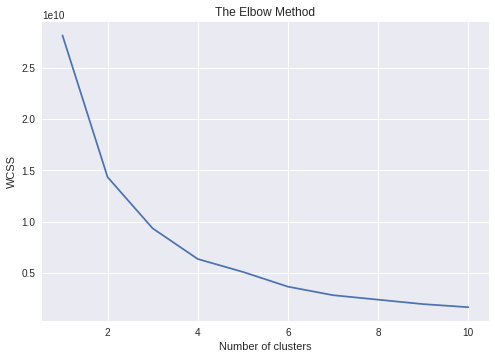

array([[17, 16],
       [56, 34]])

In [38]:
#APPLYING K-MEANS
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
y_pred = kmeans.fit_predict(X_test)
""" k-means gave us just 60% even with pca"""


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


###APPLYING RANDOM FOREST

In [39]:
# APPLYING RANDOM FOREST
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
""" RF gave us 73%"""
cm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([[17, 16],
       [16, 74]])

##MODELS AND THEIR PERFORMANCE

Of all the models the were tested , the SVM, LOGISTIC REGRESSION AND NAIVE BAYES had the best optimal performance ranging from 82-84% of which the logistic regression and SVM model did best with 84%